In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series

In [3]:
data = pd.read_csv("/Users/anujabarin/Desktop/ML project folder/churnforrpart_numeric.csv")

In [5]:
data.head()
data.isnull().sum()

Tenure                 0
InternetService_N      0
Contract_N             0
OnlineSecurity_N       0
OnlineBackup_N         0
DeviceProtection_N     0
TechSupport_N          0
StreamingTV_N          0
StreamingMovies_N      0
PaymentMethod_N        0
MonthlyCharges         0
TotalCharges          11
Churn_N                0
dtype: int64

<Axes: >

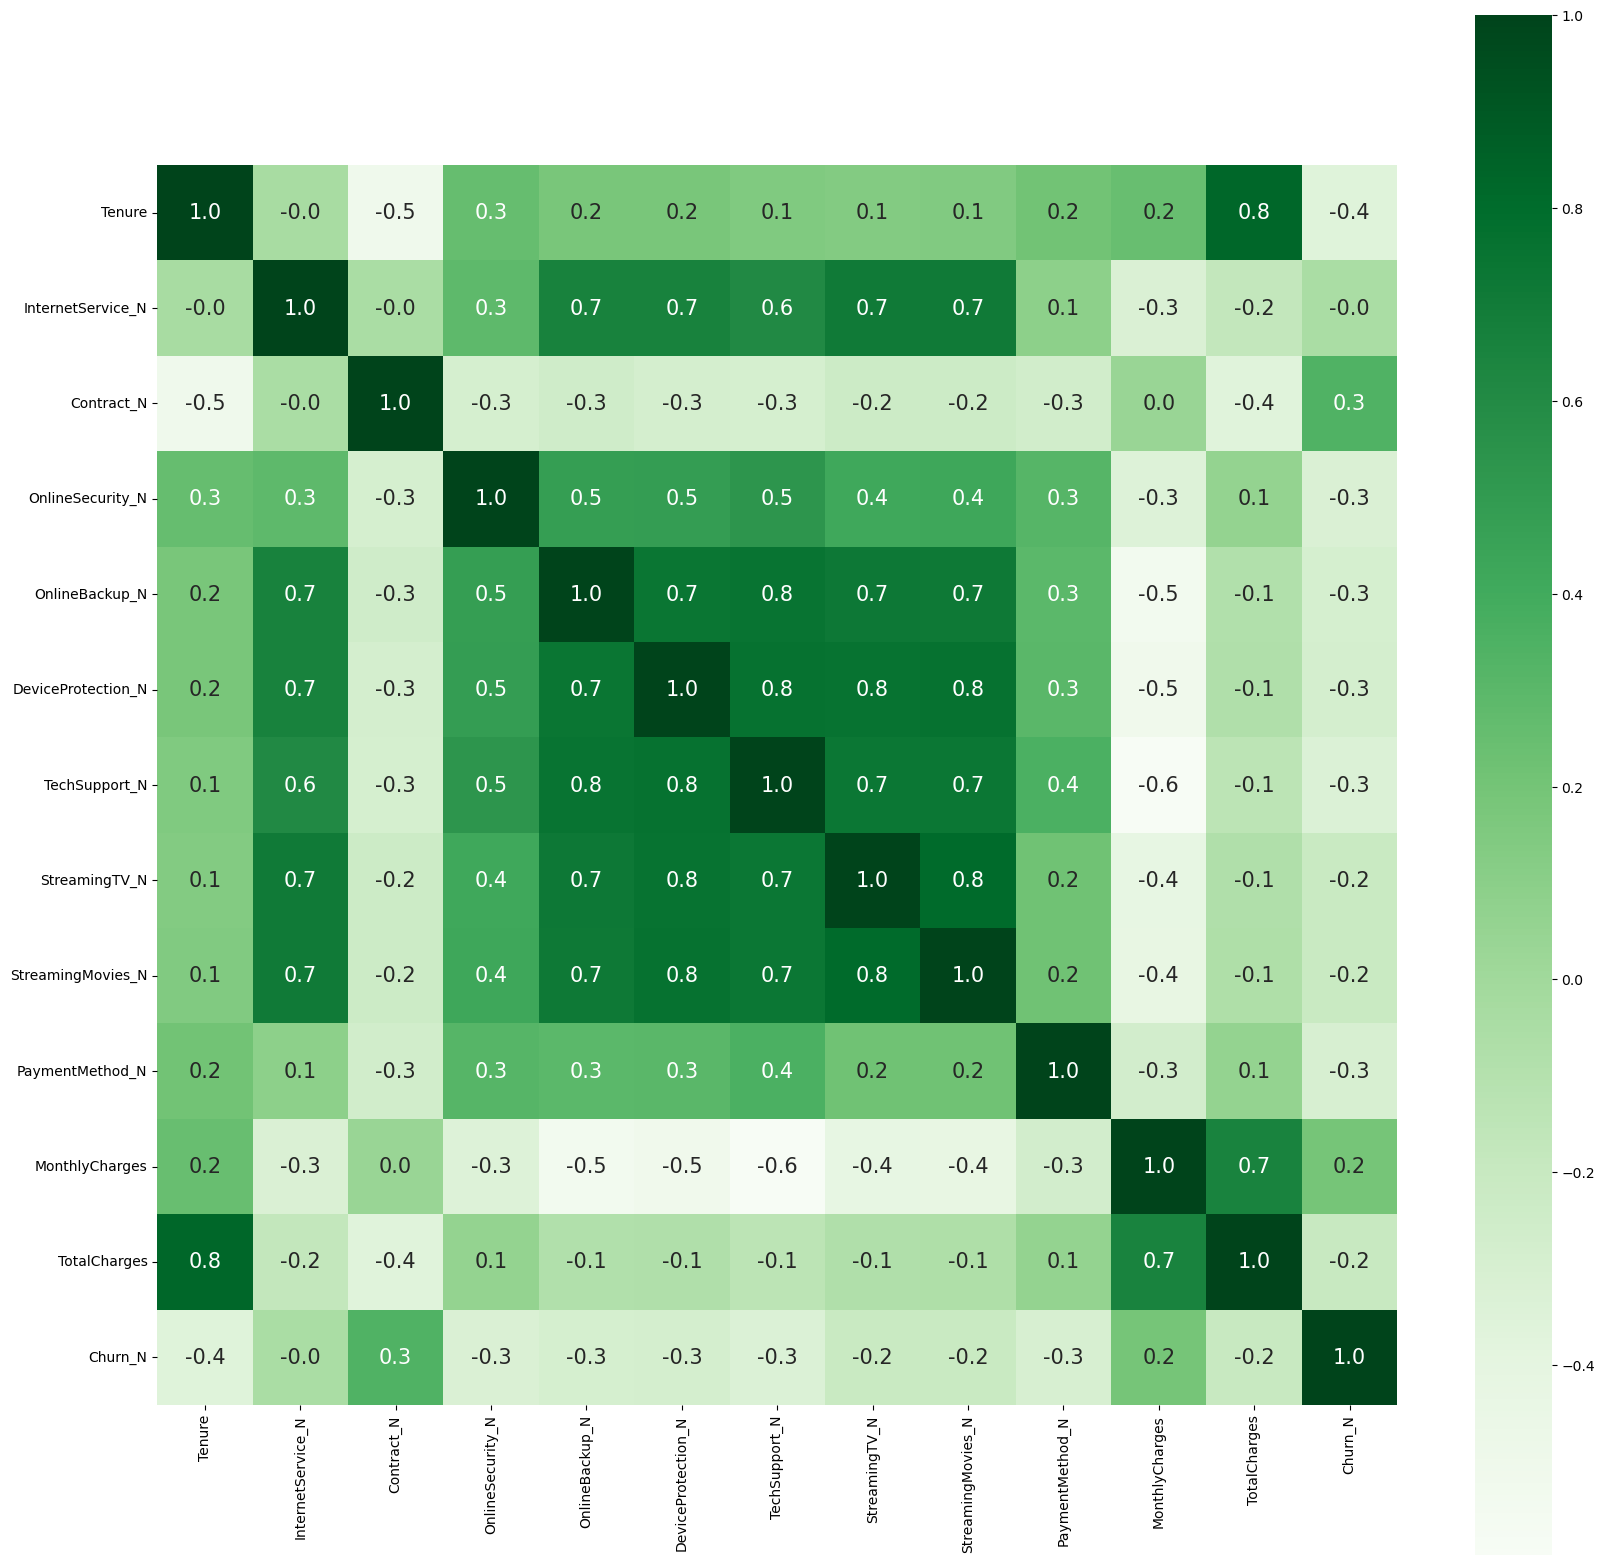

In [7]:
data = data.dropna(subset=["TotalCharges"])
corr = data.corr()
corr.shape
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [9]:
X = data.drop(['Churn_N'], axis = 1)
y = data['Churn_N']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

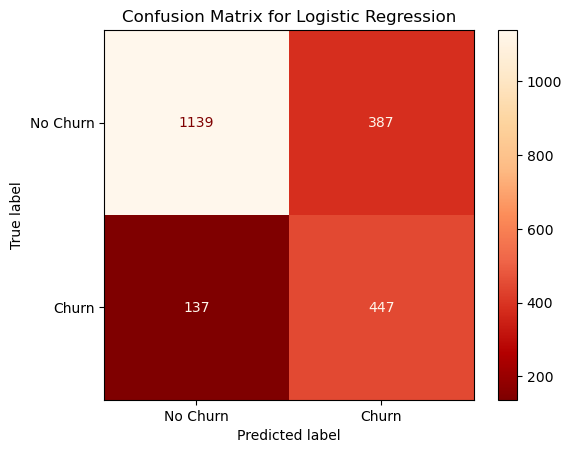

('              precision    recall  f1-score   support\n\n    No Churn       0.89      0.75      0.81      1526\n       Churn       0.54      0.77      0.63       584\n\n    accuracy                           0.75      2110\n   macro avg       0.71      0.76      0.72      2110\nweighted avg       0.79      0.75      0.76      2110\n',
 0.8375705802617642)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicting on test set
y_pred_logistic = log_reg.predict(X_test)
y_pred_proba_logistic = log_reg.predict_proba(X_test)[:, 1]

# Evaluating the model
report = classification_report(y_test, y_pred_logistic, target_names=['No Churn', 'Churn'])
auc_value = roc_auc_score(y_test, y_pred_proba_logistic) # For calculating area under the ROC curve using True Positive rate and False Positive rate. 

# Displaying confusion matrix
confusion_matrix_val = confusion_matrix(y_test, y_pred_logistic)
ConfusionMatrixDisplay(confusion_matrix_val, display_labels=['No Churn', 'Churn']).plot(cmap='OrRd_r')

plt.title("Confusion Matrix for Logistic Regression")
plt.show()

report, auc_value


In [13]:
from sklearn.ensemble import RandomForestClassifier
randomForest_Model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=1000)
randomForest_Model.fit(X_train, y_train)
y_pred_randomForest = randomForest_Model.predict(X_test)
y_pred_proba_randomForest = randomForest_Model.predict_proba(X_test)[:, 1]

In [15]:
from sklearn.svm import SVC
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1] 

In [17]:
results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Classification Report": [
        classification_report(y_test, y_pred_logistic, target_names=['No Churn', 'Churn']),
        classification_report(y_test, y_pred_randomForest, target_names=['No Churn', 'Churn']),
        classification_report(y_test, y_pred_svm, target_names=['No Churn', 'Churn'])
    ],
    "AUC Value": [
        roc_auc_score(y_test, y_pred_proba_logistic),
        roc_auc_score(y_test, y_pred_proba_randomForest),
        roc_auc_score(y_test, y_pred_proba_svm)
    ]
}

In [19]:
conf_matrices = {
    "Logistic Regression": confusion_matrix(y_test, y_pred_logistic),
    "Random Forest": confusion_matrix(y_test, y_pred_randomForest),
    "SVM": confusion_matrix(y_test, y_pred_svm)
}

results, conf_matrices

({'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
  'Classification Report': ['              precision    recall  f1-score   support\n\n    No Churn       0.89      0.75      0.81      1526\n       Churn       0.54      0.77      0.63       584\n\n    accuracy                           0.75      2110\n   macro avg       0.71      0.76      0.72      2110\nweighted avg       0.79      0.75      0.76      2110\n',
   '              precision    recall  f1-score   support\n\n    No Churn       0.82      0.90      0.86      1526\n       Churn       0.65      0.48      0.55       584\n\n    accuracy                           0.78      2110\n   macro avg       0.73      0.69      0.70      2110\nweighted avg       0.77      0.78      0.77      2110\n',
   '              precision    recall  f1-score   support\n\n    No Churn       0.80      0.71      0.75      1526\n       Churn       0.41      0.53      0.46       584\n\n    accuracy                           0.66      2110\n   ma

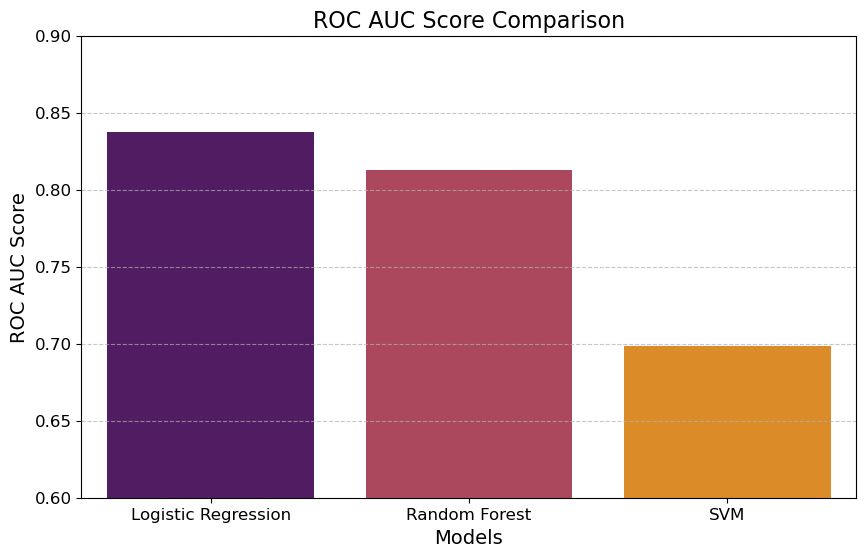

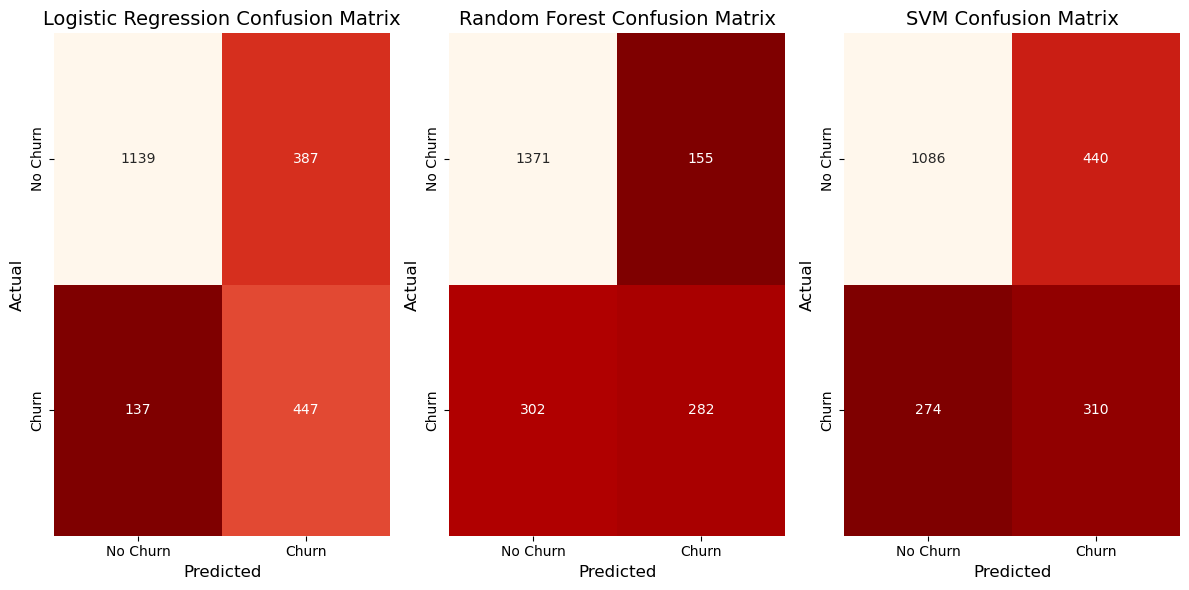

In [23]:
# Prepare data for visualization
models = ["Logistic Regression", "Random Forest", "SVM"]
roc_auc_scores = results["AUC Value"]
conf_matrix_list = list(conf_matrices.values())

# Set up figure for ROC AUC comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=roc_auc_scores, palette='inferno', dodge=False)
plt.title("ROC AUC Score Comparison", fontsize=16)
plt.ylabel("ROC AUC Score", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.ylim(0.6, 0.9)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
for i, (model_name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd_r', ax=axes[i], cbar=False)
    axes[i].set_title(f"{model_name} Confusion Matrix", fontsize=14)
    axes[i].set_xlabel("Predicted", fontsize=12)
    axes[i].set_ylabel("Actual", fontsize=12)
    axes[i].set_xticklabels(['No Churn', 'Churn'], fontsize=10)
    axes[i].set_yticklabels(['No Churn', 'Churn'], fontsize=10)

plt.tight_layout()
plt.show()